## Time Series Generation

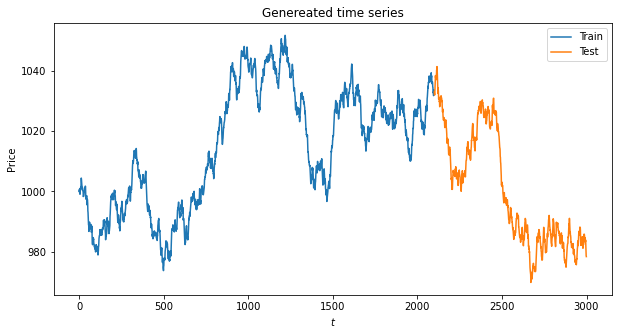

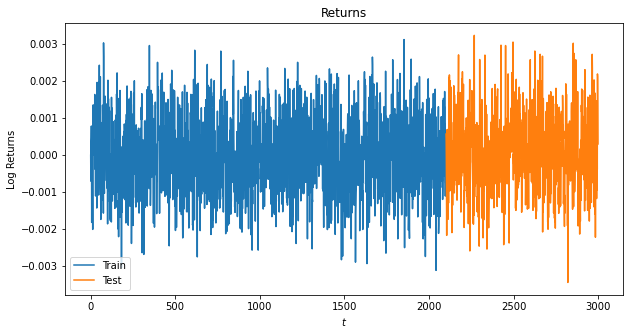

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


# Generating time series
z = np.zeros(3000)
e = np.random.normal(0,1,3000) # iid Gaussian random variables
t = np.arange(0,3000,1)
p = np.zeros(3000) # the time series

# Initial conditions
p[0] = 1000
p[1] = 1000
phi = 0.5
d = 0.02
theta = -0.3

for i in range(2,3000,1):
    z[i] = phi*(p[i-1]-p[i-2]-d)+e[i]+(theta*e[i-1]) + d
    p[i] = z[i] + p[i-1]

df = pd.DataFrame(p)
df.columns =['Close']
    
# Train/test split
y_train, y_test = train_test_split(p, test_size=0.3, random_state=0, shuffle=False)
data_train = pd.DataFrame(y_train, columns=["p"])
data_test = pd.DataFrame(y_test, columns=["p"])
                         
# Returns
data_train["returns"] = data_train.p.shift(1) / data_train.p - 1
data_test["returns"] = data_test.p.shift(1) / data_test.p - 1

# Plot
plt.figure(figsize=(10,5))
plt.plot(y_train, label="Train")
plt.plot([None for i in y_train] + [x for x in y_test], label="Test")
plt.title("Genereated time series")
plt.ylabel("Price")
plt.xlabel("$t$")
plt.legend(loc="best")
plt.show()

plt.figure(figsize=(10,5))
plt.plot(data_train["returns"], w)
plt.plot([None for i in data_train["returns"]] + [x for x in data_test["returns"]], label="Test")
plt.title("Returns")
plt.ylabel("Log Returns")
plt.xlabel("$t$")
plt.legend(loc="best")
plt.show()

# Trading Strategies 

### Mean Reversion Strategy

1. Boolinger Band

In [2]:
S = df['Close'].values

T = 3000
dt = 1
N = round(T/dt)

t =  np.linspace(0, T, N)
ma = np.zeros(np.shape(S))
w = np.zeros(np.shape(S))

C = np.zeros(np.shape(S))
C[0] = 10000  

cumsum = [0]
time_window = 50

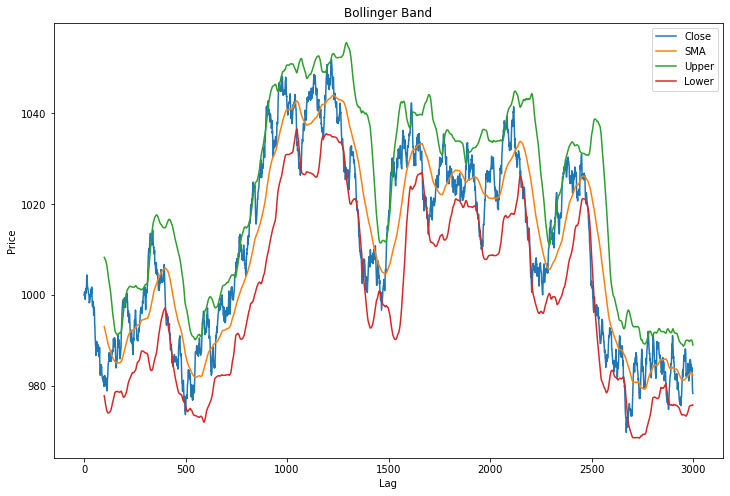

In [3]:
# Calculate the Simple Moving Average 
df['SMA'] = df.Close.rolling(window=100).mean() 

# Calculate the Standard Deviation 
df['stddev'] = df.Close.rolling(window=100).std() 

# calculate the Upper and Lower Bollinger Band
df['Upper'] = df.SMA + 2*df.stddev 
df['Lower'] = df.SMA - 2*df.stddev

# create a list of columns 
column_list = ['Close', 'SMA', 'Upper', 'Lower']

#Plot the data
df[column_list].plot(figsize=(12,8))
plt.title('Bollinger Band')
plt.xlabel('Lag')
plt.ylabel('Price')
plt.show()

# Implement Buy and Sell Signals
df['Buy_Signal'] = np.where(df.Lower > df.Close, True, False)
df['Sell_Signal'] = np.where(df.Upper < df.Close, True, False)

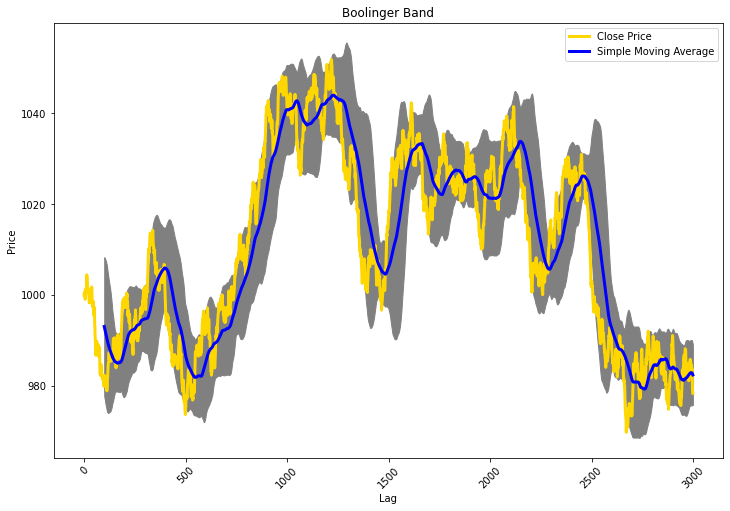

In [4]:
# Plot the shade are between the two Bollinger Bands

# get a time period
period = 100

fig = plt.figure(figsize=(12,8))

#Add subplot
ax = fig.add_subplot(1,1,1)

#Get the index values of the dataframe
x_axis = df.index

#Plot and shade the area between the upper and lowe band in grey
ax.fill_between(x_axis, df['Upper'], df['Lower'], color='grey')

#Plot the closing price and the moving average
ax.plot(x_axis, df['Close'], color = 'gold', lw = 3, label= 'Close Price')
ax.plot(x_axis, df['SMA'], color = 'blue', lw = 3, label= 'Simple Moving Average')
ax.set_title('Boolinger Band')
ax.set_xlabel('Lag')
ax.set_ylabel('Price')
plt.xticks(rotation = 45)
ax.legend()
plt.show()

In [5]:
# Create a new dataframe
new_df = df[period-1:]

#Show new data
new_df = new_df.reset_index()
new_df

,index,Close,SMA,stddev,Upper,Lower,Buy_Signal,Sell_Signal
0,99,980.804996,993.079316,7.620170,1008.319657,977.838976,False,False
1,100,980.508415,992.884400,7.690323,1008.265046,977.503755,False,False
2,101,982.331391,992.707714,7.728066,1008.163847,977.251582,False,False
3,102,982.106417,992.521781,7.757456,1008.036693,977.006868,False,False
4,103,980.118669,992.319671,7.815049,1007.949768,976.689573,False,False
...,...,...,...,...,...,...,...,...
2896,2995,983.752631,982.833965,3.539139,989.912243,975.755686,False,False
2897,2996,981.595456,982.757775,3.481943,989.721660,975.793890,False,False
2898,2997,979.506557,982.664689,3.442574,989.549838,975.779540,False,False
2899,2998,978.674718,982.551193,3.384081,989.319356,975.783031,False,False


In [6]:
# Create a function to get buy and sell signals

def get_signal(data):
    
    buy_signal = []
    sell_signal = []
    
    for i in range(len(new_df['Close'])):
        if data['Close'][i] > data['Upper'][i]:  # Then you should sell
            buy_signal.append(np.nan)
            sell_signal.append(data['Close'][i])
        elif data['Close'][i] < data['Lower'][i]:  # Then you should buy
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
   
    return(buy_signal, sell_signal)

In [7]:
# Create two new columns
new_df['Buy'] = get_signal(new_df)[0]
new_df['Sell'] = get_signal(new_df)[1]

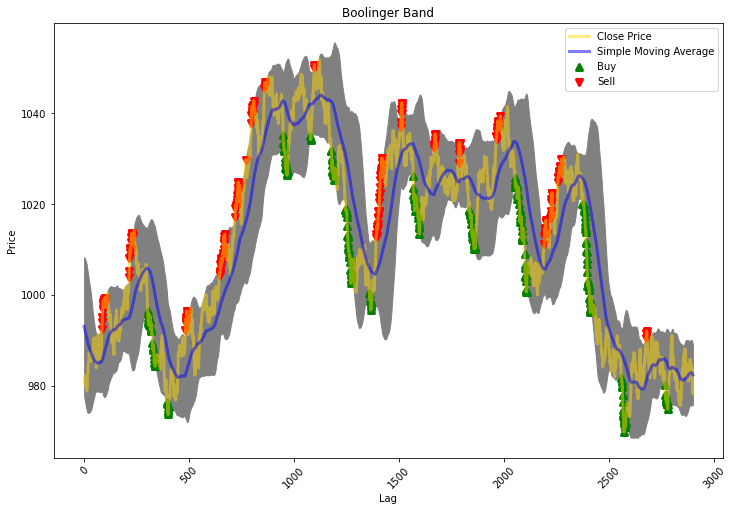

In [8]:
# Plot all the data 
fig = plt.figure(figsize=(12,8))

#Add subplot
ax = fig.add_subplot(1,1,1)

#Get the index values of the dataframe
x_axis = new_df.index

#Plot and shade the area between the upper and lowe band in grey
ax.fill_between(x_axis, new_df['Upper'], new_df['Lower'], color='grey')

#Plot the closing price and the moving average
ax.plot(x_axis, new_df['Close'], color = 'gold', lw = 3, label= 'Close Price', alpha = 0.5)
ax.plot(x_axis, new_df['SMA'], color = 'blue', lw = 3, label= 'Simple Moving Average', alpha = 0.5)
ax.scatter(x_axis, new_df['Buy'], color = 'green', lw = 3, label = 'Buy', marker = '^', alpha = 1)
ax.scatter(x_axis, new_df['Sell'], color = 'red', lw = 3, label = 'Sell', marker = 'v', alpha = 1)
ax.set_title('Boolinger Band')
ax.set_xlabel('Lag')
ax.set_ylabel('Price')
plt.xticks(rotation = 45)
ax.legend()
plt.show()

In [9]:
S = df['Close'].values

T = 3000
dt = 1
N = round(T/dt)

t =  np.linspace(0, T, N)
ma = np.zeros(np.shape(S))
w = np.zeros(np.shape(S))

C = np.zeros(np.shape(S))
C[0] = 10000  

cumsum = [0]
time_window = 50

In [10]:
# Calculate the Simple Moving Average 
df['SMA'] = df.Close.rolling(window=100).mean() 

# Calculate the Standard Deviation 
df['stddev'] = df.Close.rolling(window=100).std() 

# calculate the Upper and Lower Bollinger Band
df['Upper'] = df.SMA + 2*df.stddev 
df['Lower'] = df.SMA - 2*df.stddev

# create a list of columns 
column_list = ['Close', 'SMA', 'Upper', 'Lower']

In [11]:
# Create a new dataframe
new_df = df[period-1:]

#Show new data
new_df = new_df.reset_index()

In [12]:
# Create a function to get buy and sell signals
    
buy_signal = []
sell_signal = []
open_pos = False
    
for i, x in enumerate(S[:-1], 0):
    cumsum.append(cumsum[i] + x)
    new_df['SMA'][i] = x
    if data['Close'][i] > data['Upper'][i]:  # Then you should sell
        if open_pos == False:
            buy_signal.append(np.nan)
            sell_signal.append(data['Close'][i])
            C[i+1] = w[i]*x + C[i]
            open_pos = True
    elif data['Close'][i] < data['Lower'][i]:  # Then you should buy
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
            C[i+1] = 0
            open_pos = False
    else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
            C[i+1] = C[i]

NameError: name 'data' is not defined

1. AR Strategy

1. Trend Following Strategy

In [13]:
S = df['Close'].values

T = 3000
dt = 1
N = round(T/dt)

t =  np.linspace(0, T, N)
ma = np.zeros(np.shape(S))
w = np.zeros(np.shape(S))

C = np.zeros(np.shape(S))
C[0] = 10000  

cumsum = [0]
time_window = 50

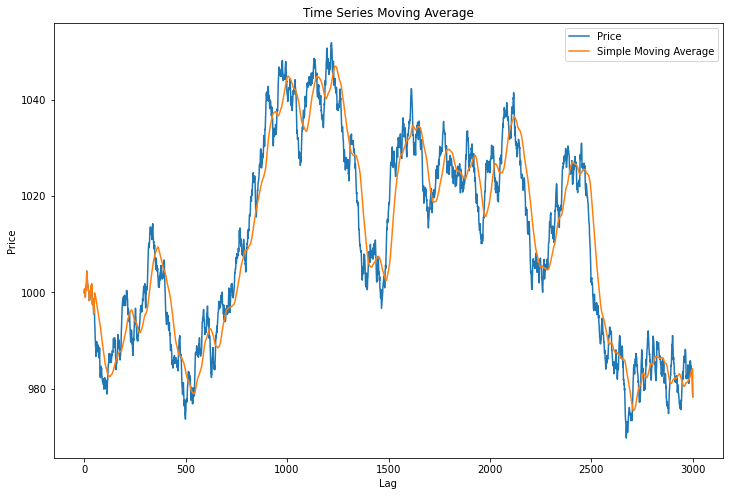

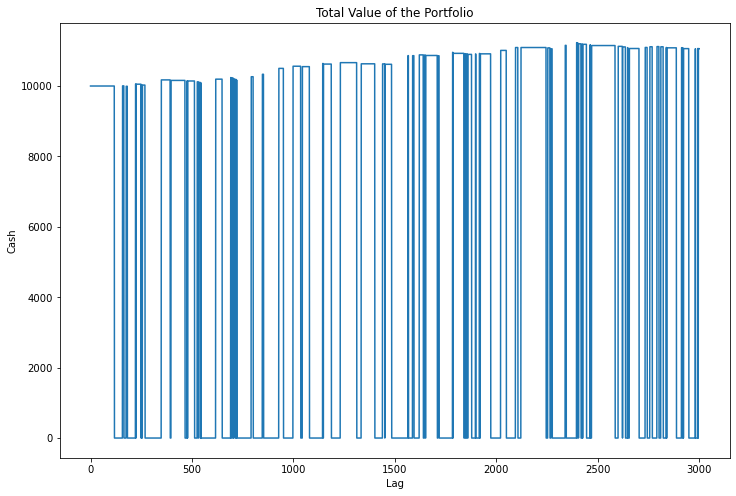

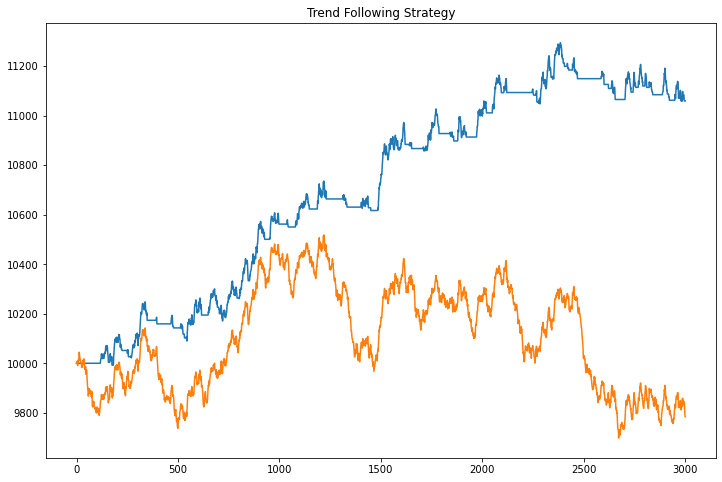

In [29]:
for i, x in enumerate(S[:-1], 0):
    cumsum.append(cumsum[i] + x)
    ma[i] = x
    if i>time_window:
        moving_ave = (cumsum[i] - cumsum[i-time_window])/(time_window)
        ma[i] = moving_ave
    
    if ma[i] == x:
        w[i+1] = w[i]
        C[i+1] = C[i]
    
    if ma[i] < x:         
        w[i+1] = C[i]/x  + w[i]
        C[i+1] = 0
        
    if ma[i] > x:
        C[i+1] = w[i]*x + C[i]
        w[i+1] = 0

ma[i+1] = S[len(S)-1]
        
tf_strategy = [a*b for a,b in zip(w,S)]+ C

plt.figure(figsize=(12,8))
plt.plot(t, S)
plt.plot(t, ma)
plt.xlabel('Lag')
plt.ylabel('Price')
plt.title('Time Series Moving Average')
plt.legend(['Price', 'Simple Moving Average'])
plt.show()

plt.figure(figsize=(12,8))
plt.plot(t, C)
plt.xlabel('Lag')
plt.ylabel('Cash')
plt.title('Total Value of the Portfolio')
plt.show()

plt.figure(figsize=(12,8))
plt.plot(t, tf_strategy)
plt.plot(t, C[0]*S/S[0])  
plt.title('Trend Following Strategy')
plt
plt.show()

2. Mean Reversion Strategy

In [30]:
def calculate_return(today, yday):
    """
    Calculate the returns between t and t-1
    
    Parameters:
        today (int): Price at time t
        yday (int): Price at time t-1
        
    Returns:
        today/yday (np.float): Divides the two values  
    """
    
    return (today/yday) -1

def sharpe_ratio(returns):
    """
    Calculates the sharpe ratio of the returns series
    
    Parameters:
        returns (np.array): Array of returns for a given series
    
    Returns:
        ratio (np.float): Calculate the sharpe ratio and annualises it
    
    """
    
    ratio = (returns.mean() / returns.std()) * np.sqrt(252)
    return ratio

def maximum_drawdown(returns):
    """
    Calcluate the maximum drawdown of the returns series
    
    Parameters:
        returns (np.array): Array of returns for a given series
        
    Returns:
        max_drawdown (np.float): The maximum drawdown of the series.
    """
    
    x = (returns+1).cumprod()
    max_drawdown = np.ptp(x)/x.max()
    return max_drawdown

def sortino_ratio(returns):
    std_neg = returns[returns<0].std()*np.sqrt(252)
    ratio = returns.mean() / std_neg
    return ratio

In [31]:
def moving_average(current_sum, prev_sum, window):    
    """
    Calculates the average between the current cumulative sum and
    the previous sum over the window period.
    
    Parameters:
        current_sum (int): the current cumulative sum value
        prev_sum (int): the cumulative sum value at the window index
        window (int): the moving average window size
        
    Returns:
        current_sum - prev_sum)/(window) (int): the average
    """
    
    return (current_sum - prev_sum)/(window)

In [32]:
def update_weight(price, cash, weight):
    """
    Updating the weight for the next timestep.
    
    Parameters:
        cash (int): current amount of cash
        price (int): price at time series
        weight (int): current weight

    Returns:
        cash / price + weight (int): divide the cash and add the weight
    """
    
    return cash / price + weight

In [33]:
def update_cash(price, cash, weight):
    """
    Updating the cash for the next timestep.
    
    Parameters:
        cash (int): current amount of cash
        price (int): price at time series
        weight (int): current weight

    Returns:
        weight * price + cash (int): multiply the weights and add the cash
    """
    
    return weight * price + cash

In [39]:
def mean_reversion(ts, window=100):
    """
    Mean reversion strategy
    
    Parameters:
        ts (np.array): Price time series
        window (int): Size of the moving average window, default to 100
    
    Returns:
        strategy (np.array): The overall strategy performance from the initial cash
    """
    
    cumsum = [0] # temporary storage area
    mov_average = np.zeros(ts.size)
    weights = np.zeros(ts.size)
    cash = np.zeros(ts.size)
    cash[0] = 10000 # initial cash

    for i, val in enumerate(ts[:-1], 0):
        cumsum.append(cumsum[i] + val) # update the next cumulative sum
        mov_average[i] = val 

        if i >= window:
            mov_average[i] = moving_average(cumsum[i], cumsum[i-window], window)

        # buy signal
        if mov_average[i] > val: 
            # update the next weight and set cash to zero
            cash[i+1], weights[i+1] = 0, update_weight(val, cash[i], weights[i])

        # sell signal
        elif mov_average[i] < val:
            # update cash and set the next weight to zero
            cash[i+1], weights[i+1] = update_cash(val, cash[i], weights[i]), 0

        else:
            cash[i+1], weights[i+1] = cash[i], weights[i]        

    mov_average[i+1] = ts[ts.size - 1]
    strategy = [a*b for a, b in zip(weights, ts)]+ cash
    
    return strategy

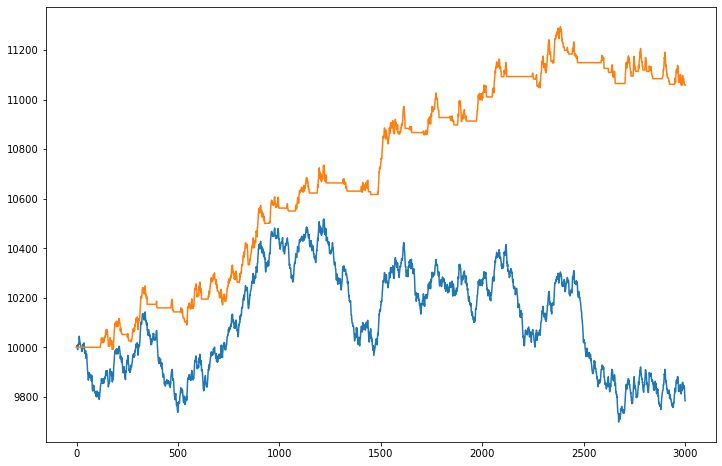

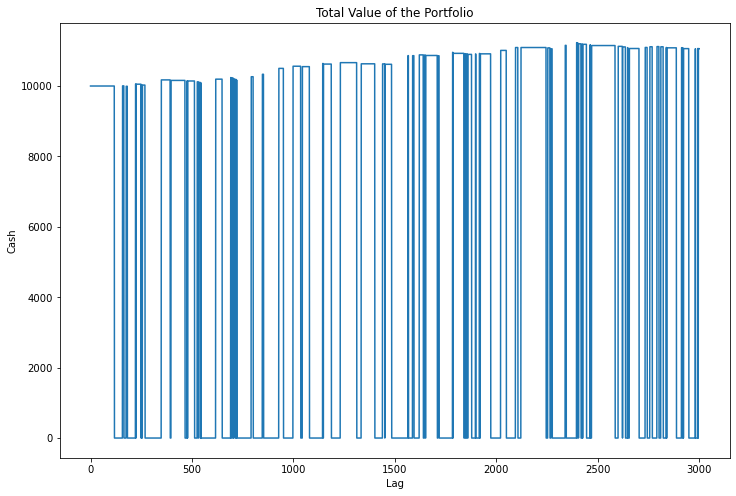

In [41]:
plt.figure(figsize=(12,8))
plt.plot(t, C[0]*S/S[0])
plt.plot(t, strategy)
plt.show()

plt.figure(figsize=(12,8))
plt.plot(t, C)
plt.xlabel('Lag')
plt.ylabel('Cash')
plt.title('Total Value of the Portfolio')
plt.show()

In [20]:
def find_mr_window(ts, max_windows=100):
    """
    Grid search optimisation for mean reversion strategy moving average window.
    
    Parameters:
        ts (np.array): Price time series
        max_windows (int): Maximum number of windows to search through
        
    Returns:
        best_strategy (np.array): The best performing prices with the optimal window size
        best_window (int): The optimal window size
    """
    
    best_sharpe = -100
    best_window = 0
    
    for i in range(5, max_windows, 5):
        # create strategy
        strategy = mean_reversion(ts, window=i)
        
        # calculate returns
        returns = []
        for j in range(1,len(strategy)):
            returns.append(calculate_return(strategy[j], strategy[j-1]))
        ratio = sharpe_ratio(np.array(returns))

        # check if it is the best sharpe ratio
        if ratio > best_sharpe:
            best_sharpe = ratio
            best_window = i
            
    best_strategy = mean_reversion(ts, window=best_window)
    return best_strategy, best_window

data_train["mean_reversion"], window_size = find_mr_window(y_train, 200)
data_test["mean_reversion"] = mean_reversion(y_test, window_size)

1. Bollinger Bands

In [521]:
df['SMA'] = df.Close.rolling(window=100).mean() # Simple Moving Average
df['stddev'] = df.Close.rolling(window=100).std() # Standard Deviation
df['Upper'] = df.SMA + 2*df.stddev # Upper Band
df['Lower'] = df.SMA - 2*df.stddev # Lowe Band

# Implement Buy and Sell Signals
df['Buy_Signal'] = np.where(df.Lower > df.Close, True, False)
df['Sell_Signal'] = np.where(df.Upper < df.Close, True, False)

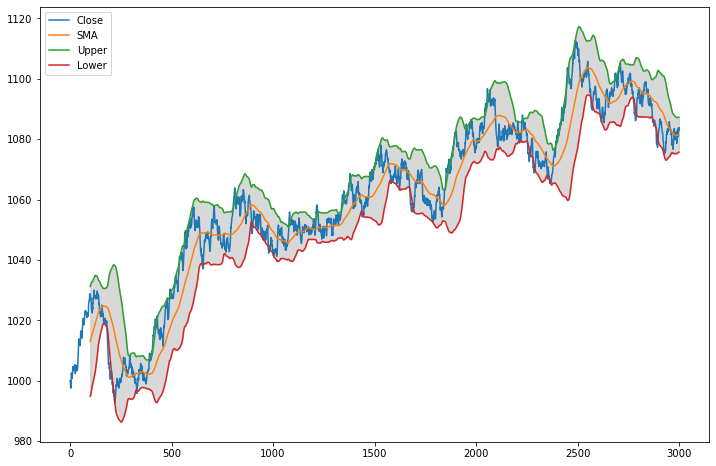

In [522]:
plt.figure(figsize=(12,8))
plt.plot(df[['Close','SMA','Upper','Lower']])
plt.legend(['Close','SMA','Upper','Lower'])
plt.fill_between(df.index, df.Upper, df.Lower, color='grey', alpha=0.3)
plt.show()

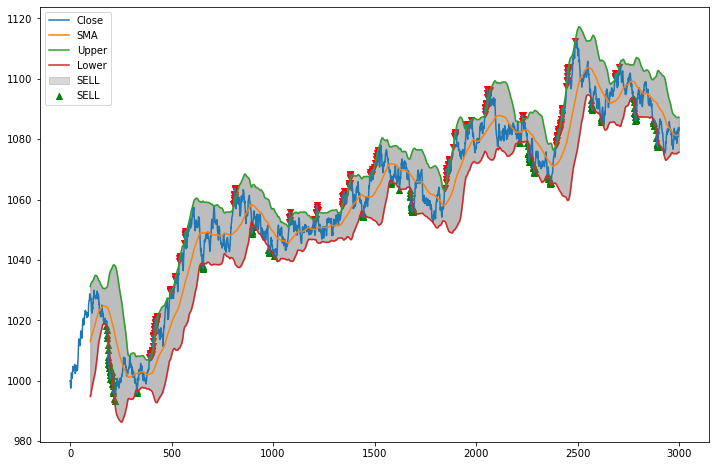

In [523]:
# Plot the buying signals
plt.figure(figsize=(12,8))
plt.plot(df[['Close','SMA','Upper','Lower']])
plt.fill_between(df.index, df.Upper, df.Lower, color='grey', alpha=0.3)
plt.scatter(df.index[df.Buy_Signal], df[df.Buy_Signal].Close, marker='^', color='g', label = 'BUY')
plt.scatter(df.index[df.Sell_Signal], df[df.Sell_Signal].Close, marker='v', color='r', label = 'SELL')
plt.legend(['Close','SMA','Upper','Lower','SELL','SELL'])
plt.fill_between(df.index, df.Upper, df.Lower, color='grey', alpha=0.3)
plt.show()

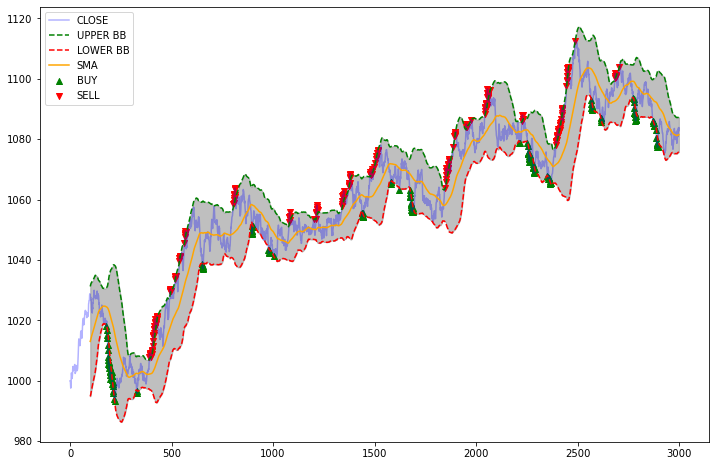

In [524]:
# Plot the buying signals
plt.figure(figsize=(12,8))
df['Close'].plot(label='CLOSE', alpha=0.3, color='b')
df['Upper'].plot(label = 'UPPER BB', linestyle = '--', color='g')
df['Lower'].plot(label = 'LOWER BB', linestyle = '--', color='r')
df['SMA'].plot(label = 'SMA', color='orange')
plt.fill_between(df.index, df.Upper, df.Lower, color='grey', alpha=0.5)
plt.scatter(df.index[df.Buy_Signal], df[df.Buy_Signal].Close, marker='^', color='g', label = 'BUY')
plt.scatter(df.index[df.Sell_Signal], df[df.Sell_Signal].Close, marker='v', color='r', label = 'SELL')
plt.legend()

# We have more sell signals than buy signals. We only


In [525]:

buys = []
sells = []
open_pos = False



for i in range(len(df)):
    if df['Lower'][i] > df['Close'][i] and trigger != 1:
        buys.append(i)
        sells.append(float('nan'))
        trigger = 1
    elif df['Upper'][i] < df['Close'][i] and trigger != -1:
        sells.append(i)
        buys.append(float('nan'))
        trigger = -1
    else:
        buys.append(float('nan'))
        sells.append(float('nan'))

df['Buy_Signal'] = buys
df['Sell_Signal'] = sells

IndexError: positional indexers are out-of-bounds

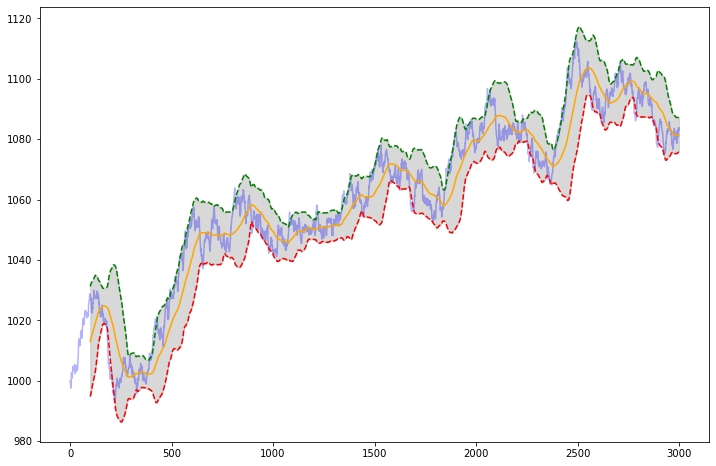

In [526]:
# Plot the buying signals
plt.figure(figsize=(12,8))
df['Close'].plot(label='CLOSE', alpha=0.3, color='b')
df['Upper'].plot(label = 'UPPER BB', linestyle = '--', color='g')
df['Lower'].plot(label = 'LOWER BB', linestyle = '--', color='r')
df['SMA'].plot(label = 'SMA', color='orange')
plt.fill_between(df.index, df.Upper, df.Lower, color='grey', alpha=0.3)
plt.scatter(df.iloc[buys].index, df.iloc[buys].Close, marker='^', color='g', label = 'BUY', s=100)
plt.scatter(df.iloc[sells].index, df.iloc[sells].Close, marker='v', color='r', label = 'SELL', s=100)
plt.legend()



In [527]:
def sma(df, window):
    sma = df.rolling(window = 100).mean()
    return sma

df['sma_100'] = sma(df['Close'], 20)
df.tail()

,Close,SMA,stddev,Upper,Lower,Buy_Signal,Sell_Signal,sma_100
2995,1081.680736,1081.374817,2.887662,1087.150140,1075.599494,NaN,NaN,1081.374817
2996,1083.245184,1081.409980,2.888825,1087.187631,1075.632330,NaN,NaN,1081.409980
2997,1083.750856,1081.445934,2.895420,1087.236775,1075.655093,NaN,NaN,1081.445934
2998,1082.626418,1081.458548,2.897811,1087.254169,1075.662926,NaN,NaN,1081.458548
2999,1083.797682,1081.472679,2.905807,1087.284293,1075.661065,NaN,NaN,1081.472679


In [528]:
def bb(df, sma, window):
    std = df.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

df['upper_bb'], df['lower_bb'] = bb(df['Close'], df['sma_100'], 20)
df.tail()

,Close,SMA,stddev,Upper,Lower,Buy_Signal,Sell_Signal,sma_100,upper_bb,lower_bb
2995,1081.680736,1081.374817,2.887662,1087.150140,1075.599494,NaN,NaN,1081.374817,1084.006820,1078.742814
2996,1083.245184,1081.409980,2.888825,1087.187631,1075.632330,NaN,NaN,1081.409980,1084.017370,1078.802590
2997,1083.750856,1081.445934,2.895420,1087.236775,1075.655093,NaN,NaN,1081.445934,1084.095642,1078.796226
2998,1082.626418,1081.458548,2.897811,1087.254169,1075.662926,NaN,NaN,1081.458548,1084.150378,1078.766717
2999,1083.797682,1081.472679,2.905807,1087.284293,1075.661065,NaN,NaN,1081.472679,1084.389472,1078.555887


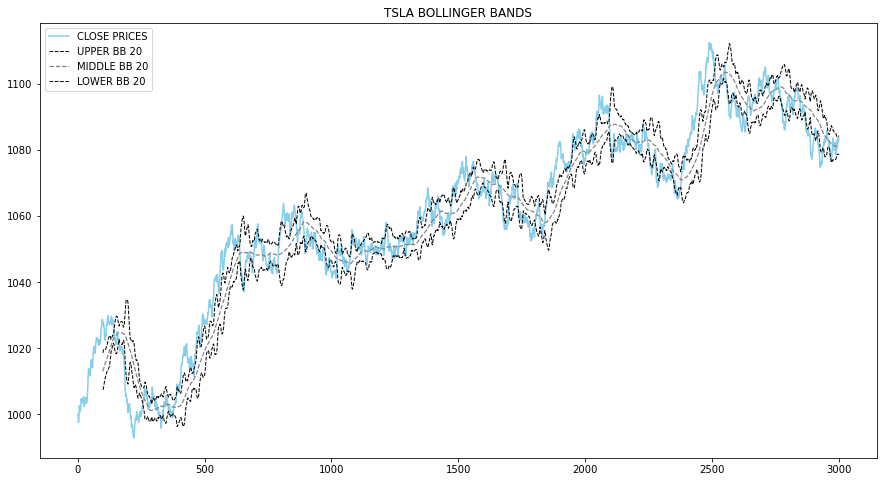

In [529]:
plt.figure(figsize=(15,8))
df['Close'].plot(label = 'CLOSE PRICES', color = 'skyblue')
df['upper_bb'].plot(label = 'UPPER BB 20', linestyle = '--', linewidth = 1, color = 'black')
df['sma_100'].plot(label = 'MIDDLE BB 20', linestyle = '--', linewidth = 1.2, color = 'grey')
df['lower_bb'].plot(label = 'LOWER BB 20', linestyle = '--', linewidth = 1, color = 'black')
plt.legend(loc = 'upper left')
plt.title('TSLA BOLLINGER BANDS')
plt.show()

In [530]:
R = df['Close']